<a href="https://colab.research.google.com/github/hmyrcmn/data/blob/main/mantarDesicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

19360859053
Hümeyra ÇİMEN
			BURSA TEKNİK UNİVERSİTESİ BİLGİSAYAR MÜHENDİSLİĞİ
				Veri Madenciliğine Giriş Proje Ödevi Rapor 

Bilgilendirme 
Veri seti: Secondary Mushroom Dataset Data Set     
Yöntem: Decision Tree based Methods
Makale Kaynak: Veri Seti Sayfasındaki / (PDF) Mushroom data creation, curation, and simulation to support classification tasks (researchgate.net) 
Veri Seti : Index of /ml/machine-learning-databases/00615 (uci.edu) secondary.csv kullanıldı.


In [1]:
# -*- coding: utf-8 -*-
"""mantarDesicion.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1U-ui9owkn-MzIGvDOFjR5uF-thaMd0bN
"""

from google.colab import drive
drive.mount('/content/drive')

!pip install pandas
!pip install scikit-learn
!pip install scikit-plot
!pip install graphviz

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import seaborn as sns
import graphviz

# Veri dosyasının yolu
file_path = "/content/drive/MyDrive/data/secondary_data.csv"

# Veriyi okuma
data = pd.read_csv(file_path, header=None)

# data.info() çıktısını kontrol etme
print(data.info())

# İlk 5 satırı görüntüleme
print(data.head())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61070 entries, 0 to 61069
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       61070 non-null  object
dtypes: object(1)
memory usage: 477.2+ KB
None
                                                   0
0  class;cap-diameter;cap-shape;cap-surface;cap-c...
1  p;15.26;x;g;o;f;e;;w;16.95;17.09;s;y;w;u;w;t;g...
2  p;16.6;x;g;o;f;e;;w;17.99;18.19;s;y;w;u;w;t;g;...


In [2]:
print(data.info)

<bound method DataFrame.info of                                                        0
0      class;cap-diameter;cap-shape;cap-surface;cap-c...
1      p;15.26;x;g;o;f;e;;w;16.95;17.09;s;y;w;u;w;t;g...
2      p;16.6;x;g;o;f;e;;w;17.99;18.19;s;y;w;u;w;t;g;...
3      p;14.07;x;g;o;f;e;;w;17.8;17.74;s;y;w;u;w;t;g;...
4      p;14.17;f;h;e;f;e;;w;15.77;15.98;s;y;w;u;w;t;p...
...                                                  ...
61065      p;1.18;s;s;y;f;f;f;f;3.93;6.22;;;y;;;f;f;;d;a
61066      p;1.27;f;s;y;f;f;f;f;3.18;5.43;;;y;;;f;f;;d;a
61067      p;1.27;s;s;y;f;f;f;f;3.86;6.37;;;y;;;f;f;;d;u
61068      p;1.24;f;s;y;f;f;f;f;3.56;5.44;;;y;;;f;f;;d;u
61069      p;1.17;s;s;y;f;f;f;f;3.25;5.45;;;y;;;f;f;;d;u

[61070 rows x 1 columns]>


In [3]:
# Veri setini doğru bir şekilde ayırma
data = data[0].str.split(';', expand=True)

# İlk satırı sütun isimleri olarak atama
data.columns = data.iloc[0]

# İlk satırı veri setinden kaldırma
data = data[1:]

# Veri setinin boyutunu görüntüleme
print(data.shape)

# Özniteliklerin isimlerini kontrol etme
print(data.columns)


(61069, 21)
Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object', name=0)


In [4]:
print(data.info)

<bound method DataFrame.info of 0     class cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
1         p        15.26         x           g         o                    f   
2         p         16.6         x           g         o                    f   
3         p        14.07         x           g         o                    f   
4         p        14.17         f           h         e                    f   
5         p        14.64         x           h         o                    f   
...     ...          ...       ...         ...       ...                  ...   
61065     p         1.18         s           s         y                    f   
61066     p         1.27         f           s         y                    f   
61067     p         1.27         s           s         y                    f   
61068     p         1.24         f           s         y                    f   
61069     p         1.17         s           s         y                    f

In [5]:
# Sütun adlarında düzeltmeler yapma
data.columns = data.columns.str.strip().str.lower().str.replace('-', '_')

# Veri setinin boyutunu görüntüleme
print(data.shape)

# Düzelti sütun adlarını kontrol etme
print(data.columns)


(61069, 21)
Index(['class', 'cap_diameter', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_height', 'stem_width', 'stem_root', 'stem_surface', 'stem_color',
       'veil_type', 'veil_color', 'has_ring', 'ring_type', 'spore_print_color',
       'habitat', 'season'],
      dtype='object', name=0)


In [6]:
# Sütun adlarını güncelleme
data.columns = ['class', 'cap_diameter', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_height', 'stem_width', 'stem_root', 'stem_surface', 'stem_color',
       'veil_type', 'veil_color', 'has_ring', 'ring_type', 'spore_print_color',
       'habitat', 'season']


In [7]:
print(data.info)

<bound method DataFrame.info of       class cap_diameter cap_shape cap_surface cap_color does_bruise_or_bleed  \
1         p        15.26         x           g         o                    f   
2         p         16.6         x           g         o                    f   
3         p        14.07         x           g         o                    f   
4         p        14.17         f           h         e                    f   
5         p        14.64         x           h         o                    f   
...     ...          ...       ...         ...       ...                  ...   
61065     p         1.18         s           s         y                    f   
61066     p         1.27         f           s         y                    f   
61067     p         1.27         s           s         y                    f   
61068     p         1.24         f           s         y                    f   
61069     p         1.17         s           s         y                    f

In [8]:
labels = data['class']
data = data.drop('class', axis=1)


In [9]:

# Veri setinin boyutunu görüntüleme
print(data.shape)


(61069, 20)


In [10]:

# Her özniteliğin benzersiz değerlerinin sayısını görüntüleme
for col in data.columns:
    print(col, len(data[col].unique()))


cap_diameter 2571
cap_shape 7
cap_surface 12
cap_color 12
does_bruise_or_bleed 2
gill_attachment 8
gill_spacing 4
gill_color 12
stem_height 2226
stem_width 4630
stem_root 6
stem_surface 9
stem_color 13
veil_type 2
veil_color 7
has_ring 2
ring_type 9
spore_print_color 8
habitat 8
season 4


In [11]:

# Eksik değerleri "?" ile doldurma
data = data.replace('?', np.nan)


In [12]:

# Eksik değerleri içeren satırları veri setinden kaldırma
data = data.dropna()


In [13]:
print(data.info)

<bound method DataFrame.info of       cap_diameter cap_shape cap_surface cap_color does_bruise_or_bleed  \
1            15.26         x           g         o                    f   
2             16.6         x           g         o                    f   
3            14.07         x           g         o                    f   
4            14.17         f           h         e                    f   
5            14.64         x           h         o                    f   
...            ...       ...         ...       ...                  ...   
61065         1.18         s           s         y                    f   
61066         1.27         f           s         y                    f   
61067         1.27         s           s         y                    f   
61068         1.24         f           s         y                    f   
61069         1.17         s           s         y                    f   

      gill_attachment gill_spacing gill_color stem_height stem_widt

In [14]:

# Veri setindeki kategorik değişkenleri sayısal değerlere dönüştürme
data = pd.get_dummies(data)


In [15]:

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [16]:

# Random Forest sınıflandırma modelini oluşturma ve eğitme
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:

# Test setindeki verileri kullanarak modelin performansını ölçme
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [18]:


# Performans ölçütlerini ekrana yazdırma
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", class_report)


Accuracy: 0.9996725069592272
Confusion Matrix:
 [[5371    3]
 [   1 6839]]
Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      5374
           p       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



<Axes: >

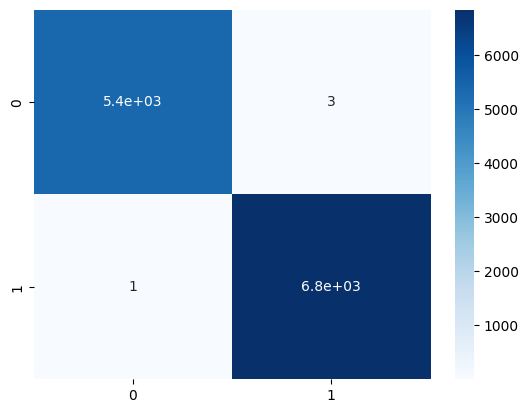

In [19]:

# Confusion Matrix'i görselleştirme
sns.heatmap(confusion_mat, annot=True, cmap="Blues")



Accuracy: 0.9996725069592272
Confusion Matrix:
 [[5371    3]
 [   1 6839]]
Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      5374
           p       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



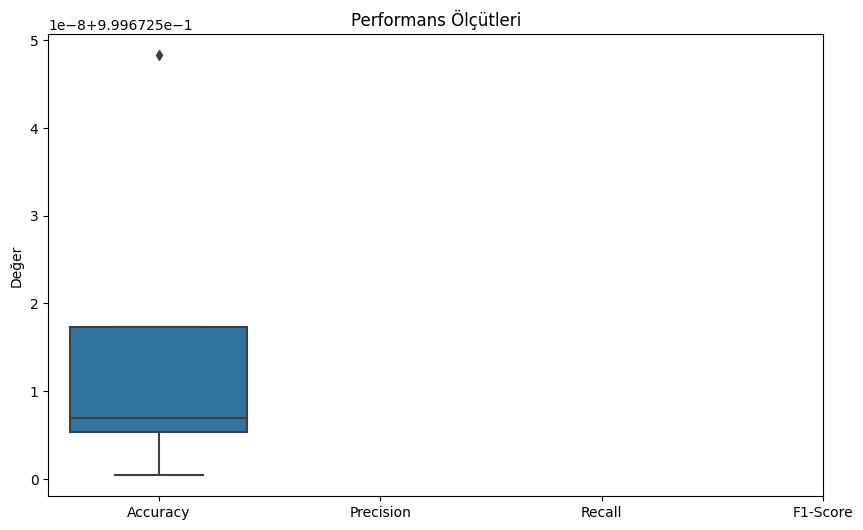

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Performans ölçütlerini ekrana yazdırma
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", class_report)

# Precision, Recall ve F1-Score ölçütlerini elde etme
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Performans ölçütlerini bir liste olarak tanımlama
performance_metrics = [accuracy, precision, recall, f1_score]

# Box plot'u oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(performance_metrics)
plt.xticks(range(4), ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
plt.title('Performans Ölçütleri')
plt.ylabel('Değer')
plt.show()


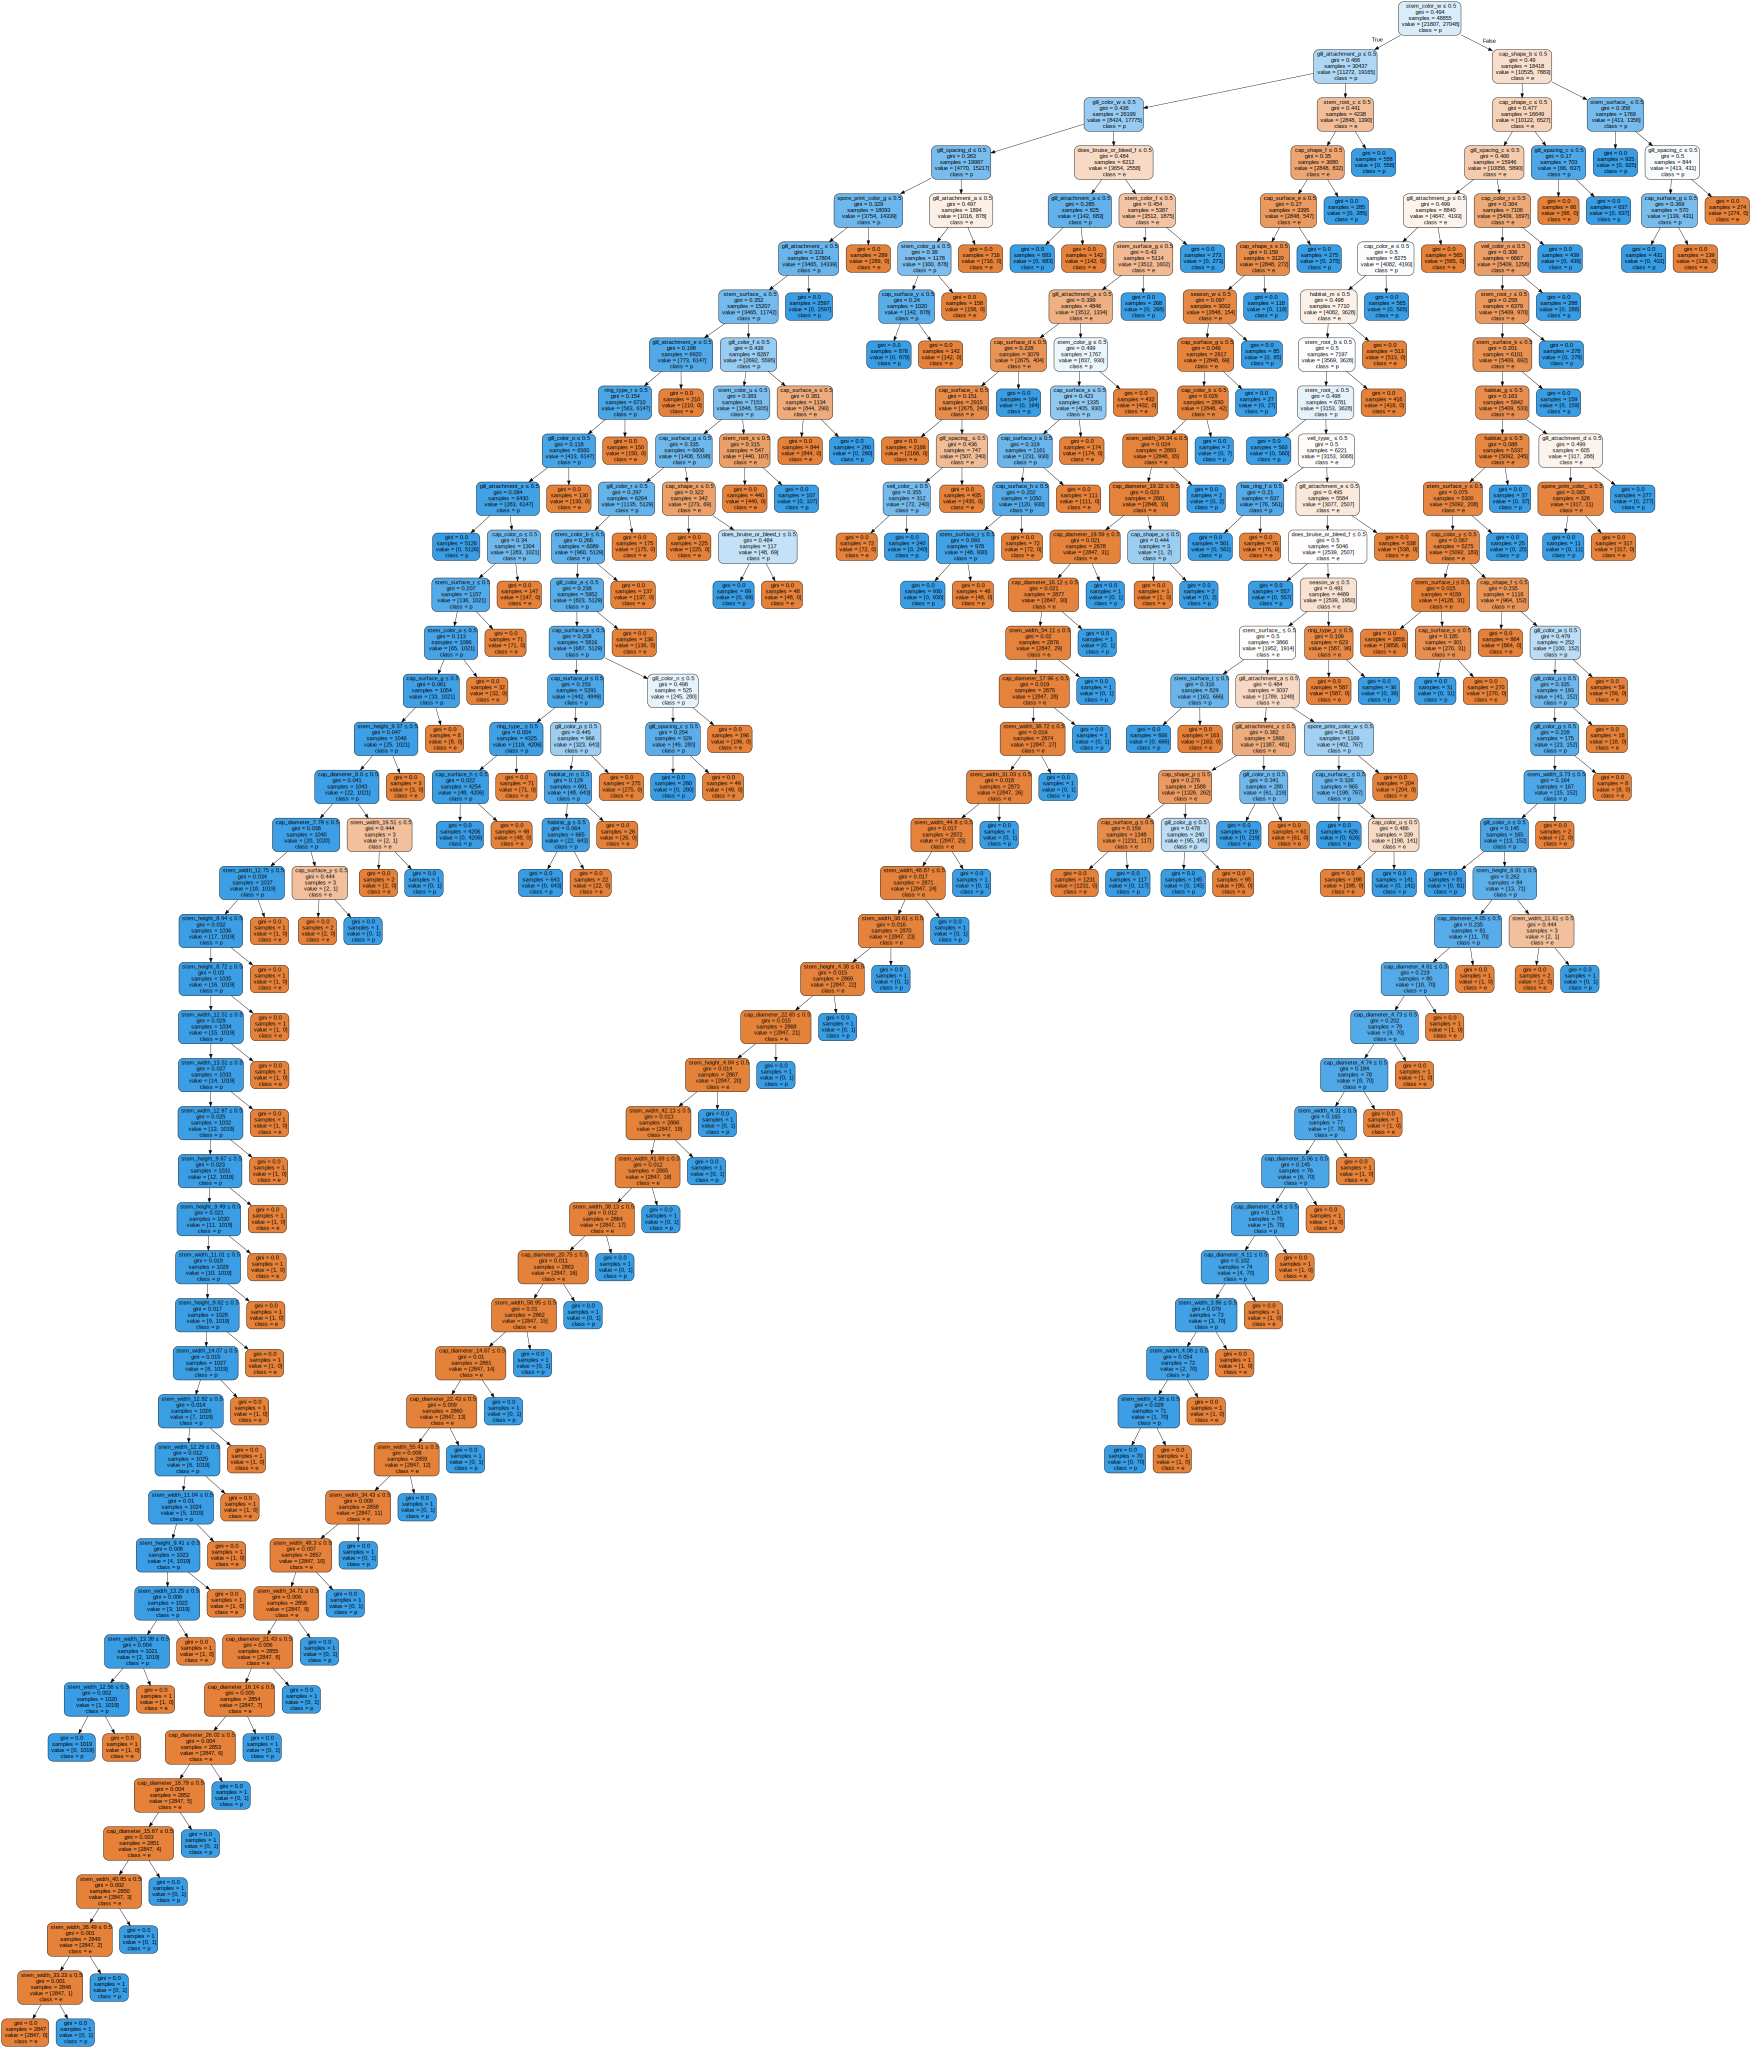

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Karar ağacını görselleştirme
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
X = X_train
y = y_train

dot_data = tree.export_graphviz(dtc, out_file=None, 
                      feature_names=X.columns,  
                      class_names=y.unique(),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

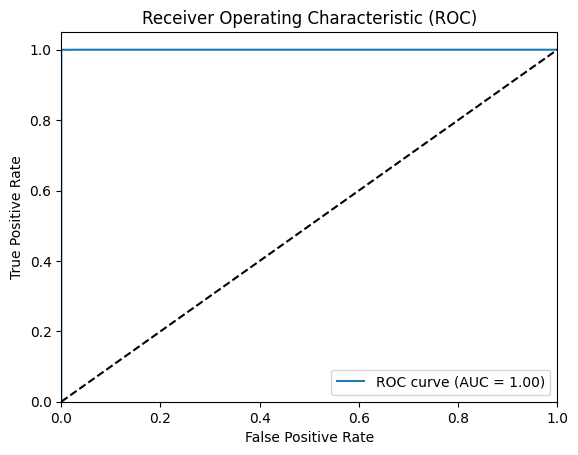

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Gerçek etiketleri uygun formata dönüştürün
y_true = [0 if label == 'e' else 1 for label in y_test]

# Modelin tahminlerini alın
y_pred = rf.predict_proba(X_test)[:, 1]  # Sınıf olasılıklarını kullanın

# FPR, TPR ve eşik değerlerini hesaplayın
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# AUC hesaplayın
auc_score = auc(fpr, tpr)

# ROC eğrisini çizin
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
